In [1]:
#mcm Ising model - Importance sampling
#Fabian Jöbstl
#07022024
import random
import numpy as np
import matplotlib.pyplot as plt
import numba
from numba import jit,njit
import time

<div>
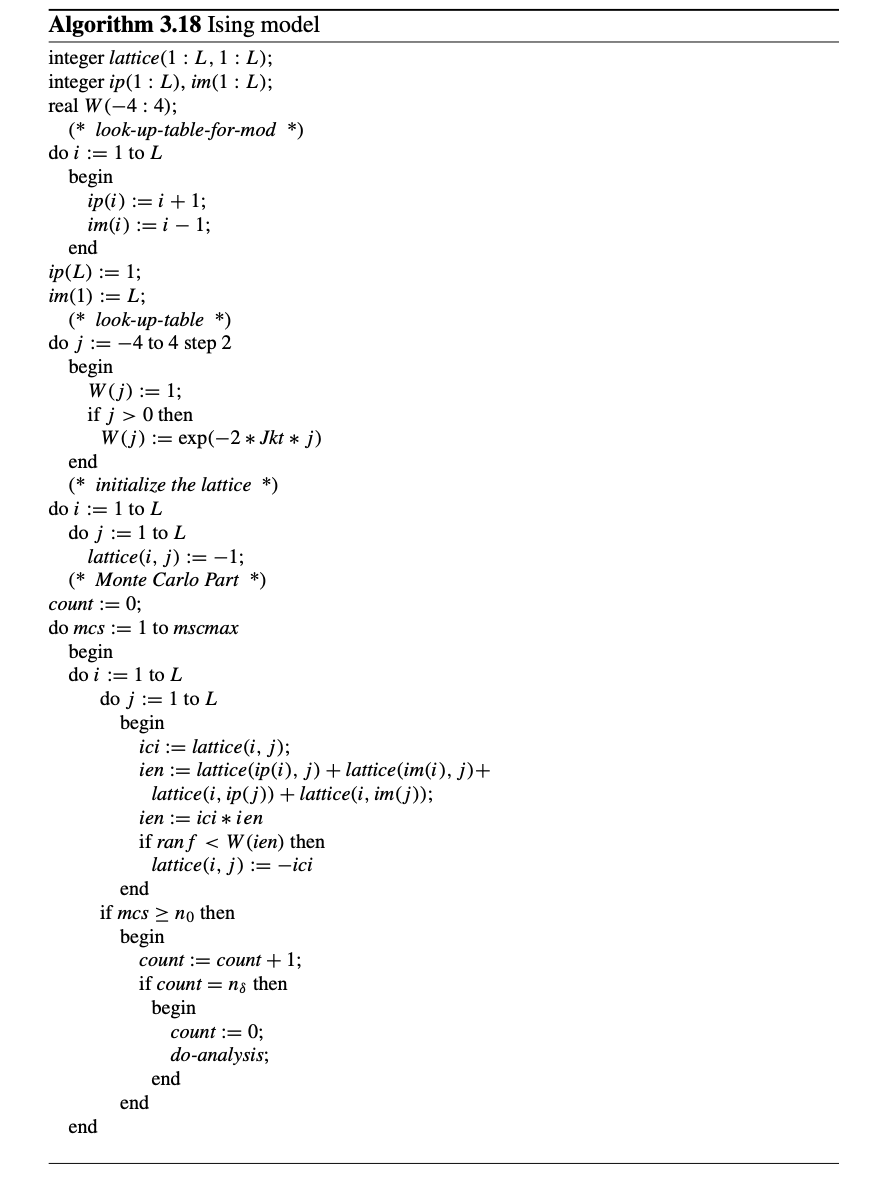
</div>

## Basic 2D Ising Model
### Plots: Configurations for different J, magnetization vs. mcs, M(J)

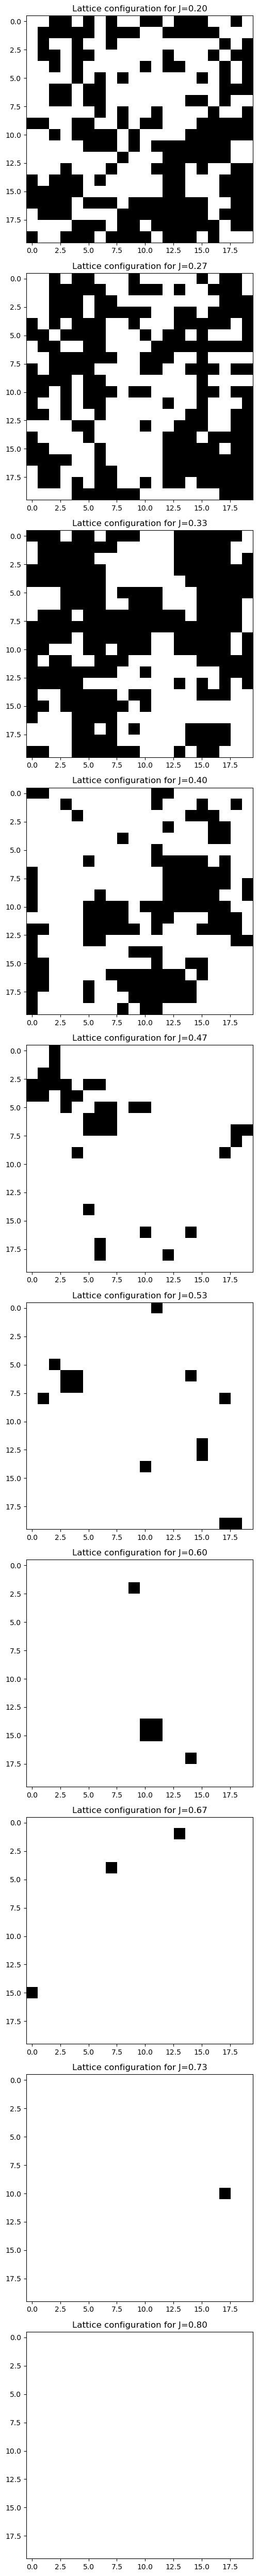

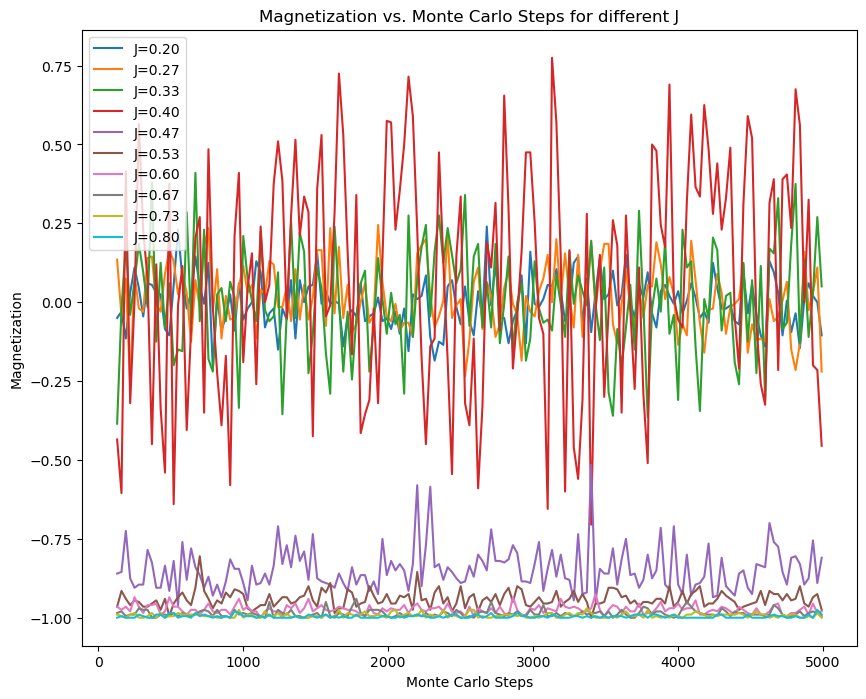

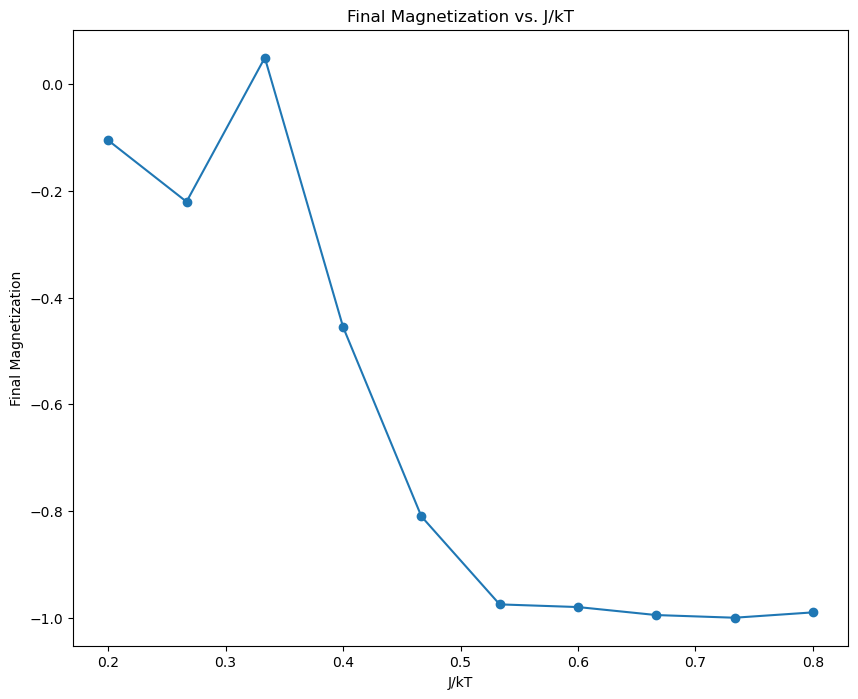

In [9]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Constants
L = 20
kT = 1  # Set kT to 1

# Lookup tables for periodic boundary conditions
ip = [(i + 1) % L for i in range(L)]  # Next index with PBC
im = [(i - 1) % L for i in range(L)]  # Previous index with PBC

# Lookup table for the weights
def weight_table(J, kT):
    W = np.ones(5)  # Initialize W as an array of ones
    for j in range(-4, 5, 2):  # Loop over the specified range
        index = (j + 4) // 2  # Convert energy change to index
        if j > 0:
            W[index] = np.exp(-2 * j * J / kT)  # Update W if j > 0
    return W

# Initialize lattice
def initial_lattice(L):
    return np.random.choice([-1, -1], size=(L, L))

# Monte Carlo simulation
#@jit
def mc_simulation(lattice, J, kT, W, mcsmax, no, n_delta):
    magnetizations = []  # Store magnetization values
    for mcs in range(1, mcsmax + 1):  # Monte Carlo steps
        for i in range(L):
            for j in range(L):
                ici = lattice[i, j]
                ien = ici * (lattice[ip[i], j] + lattice[im[i], j] + lattice[i, ip[j]] + lattice[i, im[j]])
                index = (ien + 4) // 2  # Convert energy change to index
                if random.random() < W[index]:
                    lattice[i, j] *= -1  # Flip the spin
        # Perform analysis every n_delta steps after no equilibration steps
        if mcs > no and (mcs - no) % n_delta == 0:
            magnetizations.append(np.sum(lattice)/(L**2))
    return magnetizations, lattice


# Function to run the simulation for different values of J and collect results
def run_simulation_for_different_J(J_values, mcsmax, no, n_delta):
    results = {}
    for J in J_values:
        W = weight_table(J, kT)
        lattice = initial_lattice(L)
        mag_vs_mcs, final_lattice = mc_simulation(lattice, J, kT, W, mcsmax, no, n_delta)
        results[J] = {
            'magnetizations': mag_vs_mcs,
            'final_lattice': final_lattice,
            'final_magnetization': mag_vs_mcs[-1]
        }
    return results

# Function to plot all results
def plot_results(results, J_values, mcsmax, no, n_delta):
    # Figure 1: Lattice configurations for different J values
#     plt.figure(figsize=(10, len(J_values) * 5))
#     for i, J in enumerate(J_values, start=1):
#         plt.subplot(len(J_values), 1, i)
#         plt.imshow(results[J]['final_lattice'], cmap='binary')
#         plt.title(f'Lattice configuration for J={J:.2f}')
#     plt.tight_layout()
#     plt.show()

    # Figure 2: Magnetization as a function of Monte Carlo steps for different J values
#     plt.figure(figsize=(10, 8))
#     for J in J_values:
#         steps = range(no + n_delta, mcsmax + 1, n_delta)
#         plt.plot(steps, results[J]['magnetizations'], label=f'J={J:.2f}')
#     plt.xlabel('Monte Carlo Steps')
#     plt.ylabel('Magnetization')
#     plt.title('Magnetization vs. Monte Carlo Steps for different J')
#     plt.legend()
#     plt.show()

    # Figure 3: Final magnetization as a function of different J values
    final_magnetizations = [results[J]['final_magnetization'] for J in J_values]
    plt.figure(figsize=(10, 8))
    plt.plot(J_values, final_magnetizations, 'o-')
    plt.xlabel('J/kT')
    plt.ylabel('Final Magnetization')
    plt.title('Final Magnetization vs. J/kT')
    plt.show()

# Example usage
# Example usage
J_values = np.linspace(0.2, 0.8, 10)  # Different J values
#J_values = [0.459,0.46,0.461]
mcsmax = 5000  # Number of Monte Carlo steps
no = 100  # Number of equilibration steps
n_delta = 30  # Interval of Monte Carlo steps to skip for analysis

#start_time = time.time()
final_results = run_simulation_for_different_J(J_values, mcsmax, no, n_delta)
#end_time = time.time()
#print(f"Simulation run time: {end_time - start_time:.2f} seconds")
plot_results(final_results, J_values, mcsmax, no, n_delta)


## Focus on Magnetization and Susceptibility

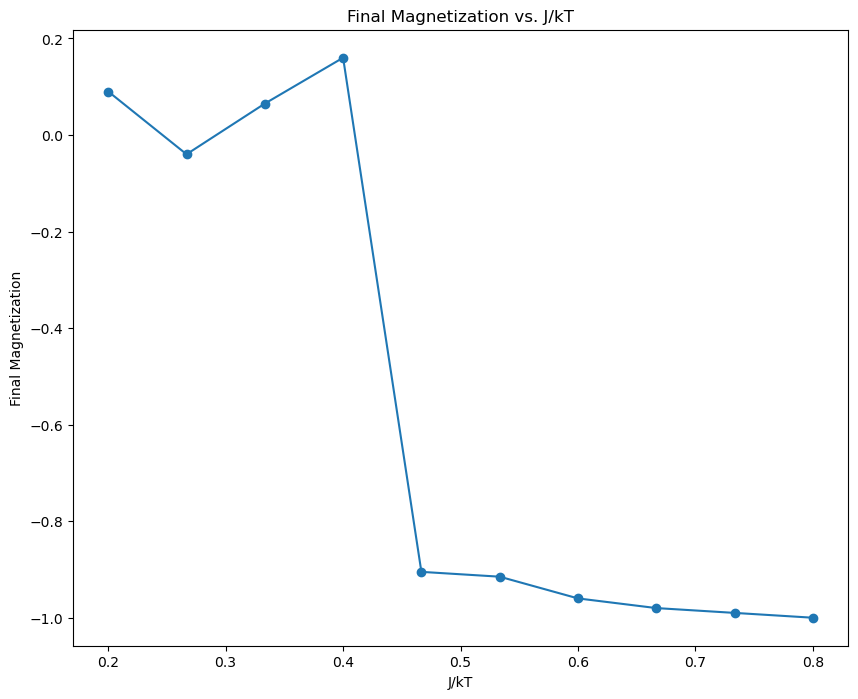

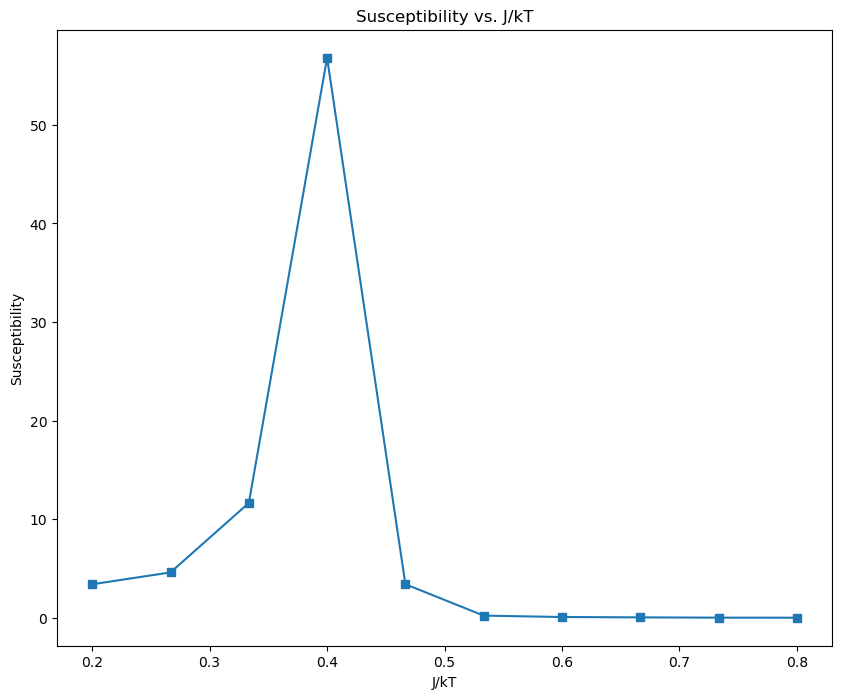

In [31]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Constants
L = 20
kT = 1  # Set kT to 1

# Lookup tables for periodic boundary conditions
ip = [(i + 1) % L for i in range(L)]  # Next index with PBC
im = [(i - 1) % L for i in range(L)]  # Previous index with PBC

# Lookup table for the weights
def weight_table(J, kT):
    W = np.ones(5)  # Initialize W as an array of ones
    for j in range(-4, 5, 2):  # Loop over the specified range
        index = (j + 4) // 2  # Convert energy change to index
        if j > 0:
            W[index] = np.exp(-2 * j * J / kT)  # Update W if j > 0
    return W

# Initialize lattice
def initial_lattice(L):
    return np.random.choice([-1, -1], size=(L, L))

# Monte Carlo simulation
#@jit
def mc_simulation(lattice, J, kT, W, mcsmax, no, n_delta):
    magnetizations = []  # Store magnetization values
    mag_squared = []  # Store squared magnetization values
    for mcs in range(1, mcsmax + 1):  # Monte Carlo steps
        for i in range(L):
            for j in range(L):
                ici = lattice[i, j]
                ien = ici * (lattice[ip[i], j] + lattice[im[i], j] + lattice[i, ip[j]] + lattice[i, im[j]])
                index = (ien + 4) // 2  # Convert energy change to index
                if random.random() < W[index]:
                    lattice[i, j] *= -1  # Flip the spin
        # Perform analysis every n_delta steps after no equilibration steps
        if mcs > no and (mcs - no) % n_delta == 0:
            M = np.sum(lattice)
            magnetizations.append(M/(L**2))
            mag_squared.append((M**2)/(L**4))
    return magnetizations, mag_squared, lattice

# Function to run the simulation for different values of J and collect results
def run_simulation_for_different_J(J_values, mcsmax, no, n_delta):
    results = {}
    for J in J_values:
        W = weight_table(J, kT)
        lattice = initial_lattice(L)
        mag_vs_mcs, mag_squared, final_lattice = mc_simulation(lattice, J, kT, W, mcsmax, no, n_delta)
        mean_mag = np.mean(mag_vs_mcs)
        mean_mag_squared = np.mean(mag_squared)
        susceptibility = (mean_mag_squared - mean_mag**2) * L**2 / kT
        results[J] = {
            'magnetizations': mag_vs_mcs,
            'final_lattice': final_lattice,
            'final_magnetization': mag_vs_mcs[-1],
            'susceptibility': susceptibility
        }
    return results

# Function to plot all results
def plot_results(results, J_values, mcsmax, no, n_delta):
    # Figure 1: Lattice configurations for different J values
#     plt.figure(figsize=(10, len(J_values) * 5))
#     for i, J in enumerate(J_values, start=1):
#         plt.subplot(len(J_values), 1, i)
#         plt.imshow(results[J]['final_lattice'], cmap='binary')
#         plt.title(f'Lattice configuration for J={J:.2f}')
#     plt.tight_layout()
#     plt.show()

    # Figure 2: Magnetization as a function of Monte Carlo steps for different J values
#     plt.figure(figsize=(10, 8))
#     for J in J_values:
#         steps = range(no + n_delta, mcsmax + 1, n_delta)
#         plt.plot(steps, results[J]['magnetizations'], label=f'J={J:.2f}')
#     plt.xlabel('Monte Carlo Steps')
#     plt.ylabel('Magnetization')
#     plt.title('Magnetization vs. Monte Carlo Steps for different J')
#     plt.legend()
#     plt.show()

    # Figure 3: Final magnetization as a function of different J values
    final_magnetizations = [results[J]['final_magnetization'] for J in J_values]
    plt.figure(figsize=(10, 8))
    plt.plot(J_values, final_magnetizations, 'o-')
    plt.xlabel('J/kT')
    plt.ylabel('Final Magnetization')
    plt.title('Final Magnetization vs. J/kT')
    plt.show()
    
    susceptibilities = [results[J]['susceptibility'] for J in J_values]
    plt.figure(figsize=(10, 8))
    plt.plot(J_values, susceptibilities, 's-')
    plt.xlabel('J/kT')
    plt.ylabel('Susceptibility')
    plt.title('Susceptibility vs. J/kT')
    plt.show()
# Example usage
# Example usage
J_values = np.linspace(0.2, 0.8, 10)  # Different J values
#J_values = [0.459,0.46,0.461]
mcsmax = 5000  # Number of Monte Carlo steps
no = 100  # Number of equilibration steps
n_delta = 30  # Interval of Monte Carlo steps to skip for analysis

#start_time = time.time()
final_results = run_simulation_for_different_J(J_values, mcsmax, no, n_delta)
#end_time = time.time()
#print(f"Simulation run time: {end_time - start_time:.2f} seconds")
plot_results(final_results, J_values, mcsmax, no, n_delta)


## Obtaining the Transition point with the Binder cumulant

Simulation run time: 118.71 seconds


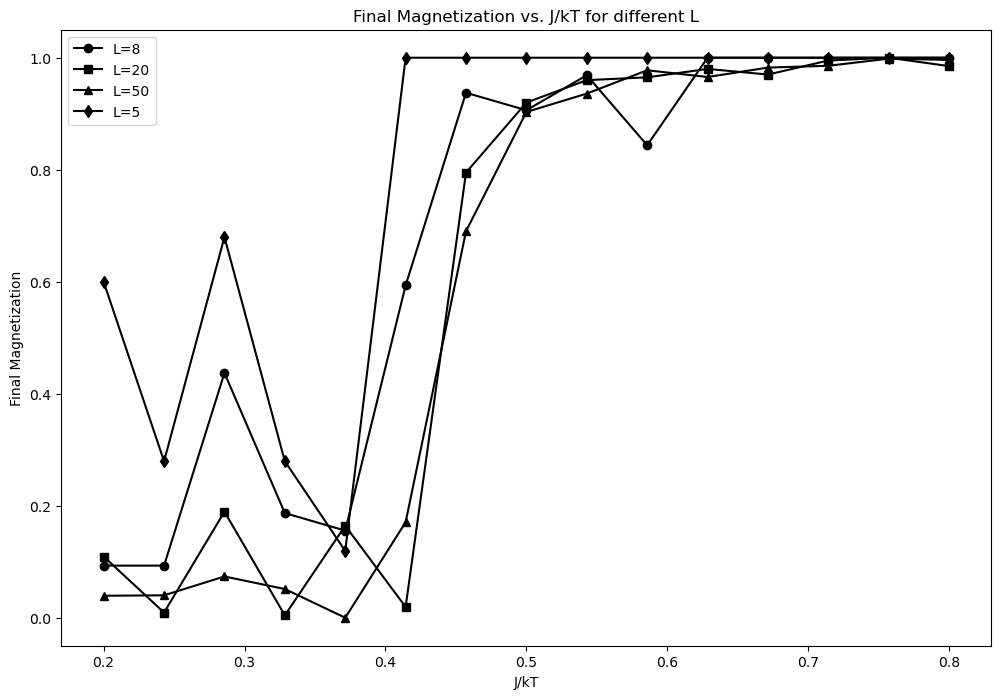

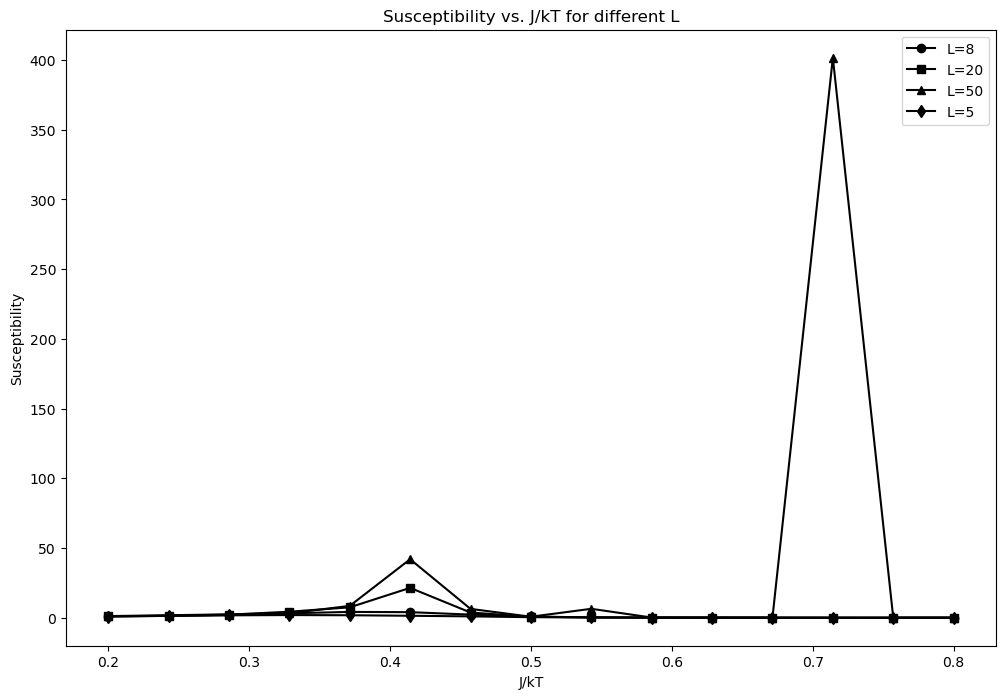

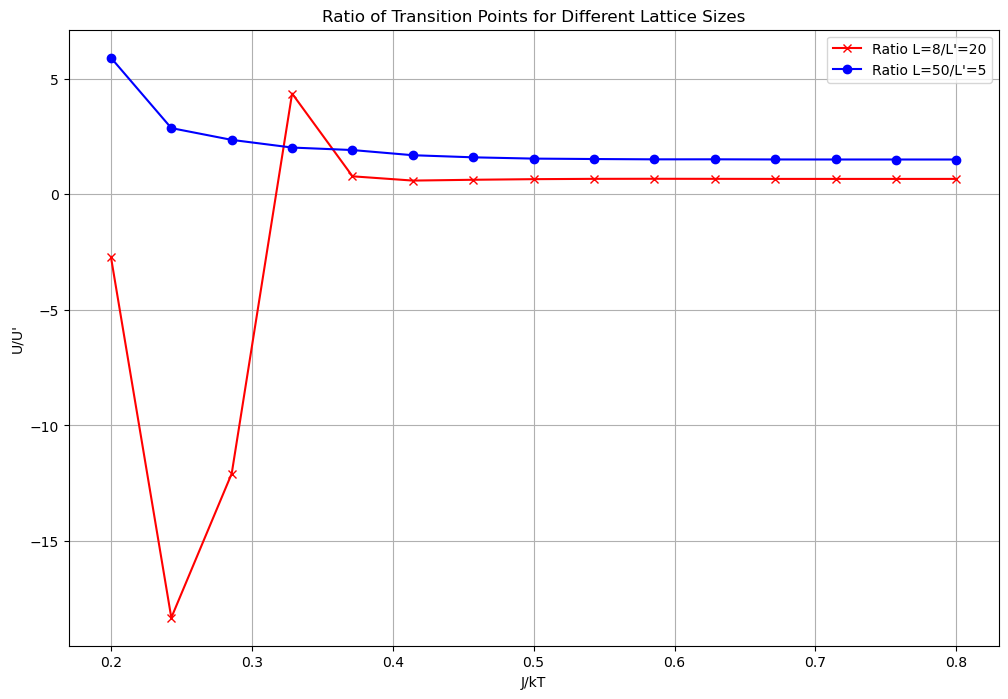

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Constants
L = 20
kT = 1  # Set kT to 1

# Lookup tables for periodic boundary conditions
#ip = [(i + 1) % L for i in range(L)]  # Next index with PBC
#im = [(i - 1) % L for i in range(L)]  # Previous index with PBC

# Lookup table for the weights
def weight_table(J, kT):
    W = np.ones(5)  # Initialize W as an array of ones
    for j in range(-4, 5, 2):  # Loop over the specified range
        index = (j + 4) // 2  # Convert energy change to index
        if j > 0:
            W[index] = np.exp(-2 * j * J / kT)  # Update W if j > 0
    return W

# Initialize lattice
def initial_lattice(L):
    return np.random.choice([-1, -1], size=(L, L))


# Monte Carlo simulation
#@jit
def mc_simulation(L, lattice, J, kT, W, mcsmax, no, n_delta):
    ip = [(i + 1) % L for i in range(L)]  # Next index with PBC, adjusted for L
    im = [(i - 1) % L for i in range(L)]  # Previous index with PBC, adjusted for L
    
    magnetizations = []
    mag_squared = []
    mag_4 = []
    for mcs in range(1, mcsmax + 1):
        for i in range(L):
            for j in range(L):
                ici = lattice[i, j]
                ien = ici * (lattice[ip[i], j] + lattice[im[i], j] + lattice[i, ip[j]] + lattice[i, im[j]])
                index = (ien + 4) // 2
                if random.random() < W[index]:
                    lattice[i, j] *= -1
        if mcs > no and (mcs - no) % n_delta == 0: # after no equilibrium steps and then every n_delta steps
            M = np.sum(lattice)
            magnetizations.append(np.abs(M)/(L**2)) # Magnetization per spin
            mag_squared.append((M**2)/(L**4)) # Squared magnetization per spin
            mag_4.append((M**4)/(L**8)) # Fourth power of magnetization per spin

    return magnetizations, mag_squared,mag_4, lattice

# Function to run the simulation for different values of J and collect results
def run_simulation_for_different_L_and_J(L_values, J_values, mcsmax, no, n_delta):
    results = {}
    for L in L_values:
        results[L] = run_simulation_for_different_J(L, J_values, mcsmax, no, n_delta)
    return results

def run_simulation_for_different_J(L, J_values, mcsmax, no, n_delta):
    local_results = {}
    for J in J_values:
        W = weight_table(J, kT)
        lattice = initial_lattice(L)
        mag_vs_mcs, mag_squared, mag_4, final_lattice = mc_simulation(L, lattice, J, kT, W, mcsmax, no, n_delta)
        mean_mag = np.mean(mag_vs_mcs)
        mean_mag_squared = np.mean(mag_squared)
        mean_mag_4 = np.mean(mag_4)
        susceptibility = (mean_mag_squared - mean_mag**2) * L**2 / kT
        transition_point = 1- mean_mag_4/(3*mean_mag_squared**2)
        local_results[J] = {
            'magnetizations': mag_vs_mcs,
            'final_lattice': final_lattice,
            'final_magnetization': mag_vs_mcs[-1],
            'susceptibility': susceptibility,
            'mean_mag_squared':mean_mag_squared,
            'mean_mag_4':mean_mag_4,
            'transition_point':transition_point
        }
    return local_results

# Function to plot all results
def plot_results_for_L(results, L_values, J_values, mcsmax, no, n_delta):
    markers = ['o', 's', '^', 'd', '*']  # Now includes diamond and star
    #line_styles = ['-', '--', '-.', ':', 'None']  
    plt.figure(figsize=(12, 8))
    for index,L in enumerate(L_values):
        final_magnetizations = [results[L][J]['final_magnetization'] for J in J_values]
        plt.plot(J_values, final_magnetizations,'k',marker=markers[index], linestyle='-',label=f'L={L}')
    plt.xlabel('J/kT')
    plt.ylabel('Final Magnetization')
    plt.title('Final Magnetization vs. J/kT for different L')
    plt.legend()
    plt.show()
    
    markers = ['o', 's', '^', 'd', '*']  # Now includes diamond and star
    #line_styles = ['-', '--', '-.', ':', 'None'] 
    plt.figure(figsize=(12, 8))
    for index,L in enumerate(L_values):
        susceptibilities = [results[L][J]['susceptibility'] for J in J_values]
        plt.plot(J_values, susceptibilities,'k',marker=markers[index], linestyle='-',label=f'L={L}')
    plt.xlabel('J/kT')
    plt.ylabel('Susceptibility')
    plt.title('Susceptibility vs. J/kT for different L')
    plt.legend()
    plt.show()
    

def plot_transition_points(final_results, L_values_pairs, J_values):
    plt.figure(figsize=(12, 8))
    
    # Define markers for distinction in the plot
    markers = ['x', 'o']
    colors = ['r', 'b']  # Use colors to differentiate the lines
    
    for pair_index, (L, L_prime) in enumerate(L_values_pairs):
        U_L = np.array([final_results[L][J]['transition_point'] for J in J_values])
        U_L_prime = np.array([final_results[L_prime][J]['transition_point'] for J in J_values])
        
        ratio = U_L / U_L_prime
        
        # Plot the ratio with distinct markers and colors
        plt.plot(J_values, ratio, marker=markers[pair_index], color=colors[pair_index],
                 linestyle='-', label=f'Ratio L={L}/L\'={L_prime}')
    
    plt.xlabel('J/kT')
    plt.ylabel('U/U\'')
    plt.title('Ratio of Transition Points for Different Lattice Sizes')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
L_values = [8, 20, 50, 5]  # Lattice sizes
J_values = np.linspace(0.2, 0.8, 15)  # J values
L_values_pairs = [(8, 20), (50, 5)]  # Pairs for ratio calculation
mcsmax = 3000  # Number of Monte Carlo steps
no = 300  # Number of equilibration steps #near equ \tau~L**(~2)
n_delta = 10  # Interval of Monte Carlo steps to skip for analysis

start_time = time.time()
final_results = run_simulation_for_different_L_and_J(L_values, J_values, mcsmax, no, n_delta)

#print(final_results)
end_time = time.time()
print(f"Simulation run time: {end_time - start_time:.2f} seconds")
plot_results_for_L(final_results, L_values, J_values, mcsmax, no, n_delta)




# Example usage


# Assuming final_results is already filled by your simulation code
plot_transition_points(final_results, L_values_pairs, J_values)



## Finite size scaling analysis of magnetization and susceptibility

Simulation run time: 330.77 seconds


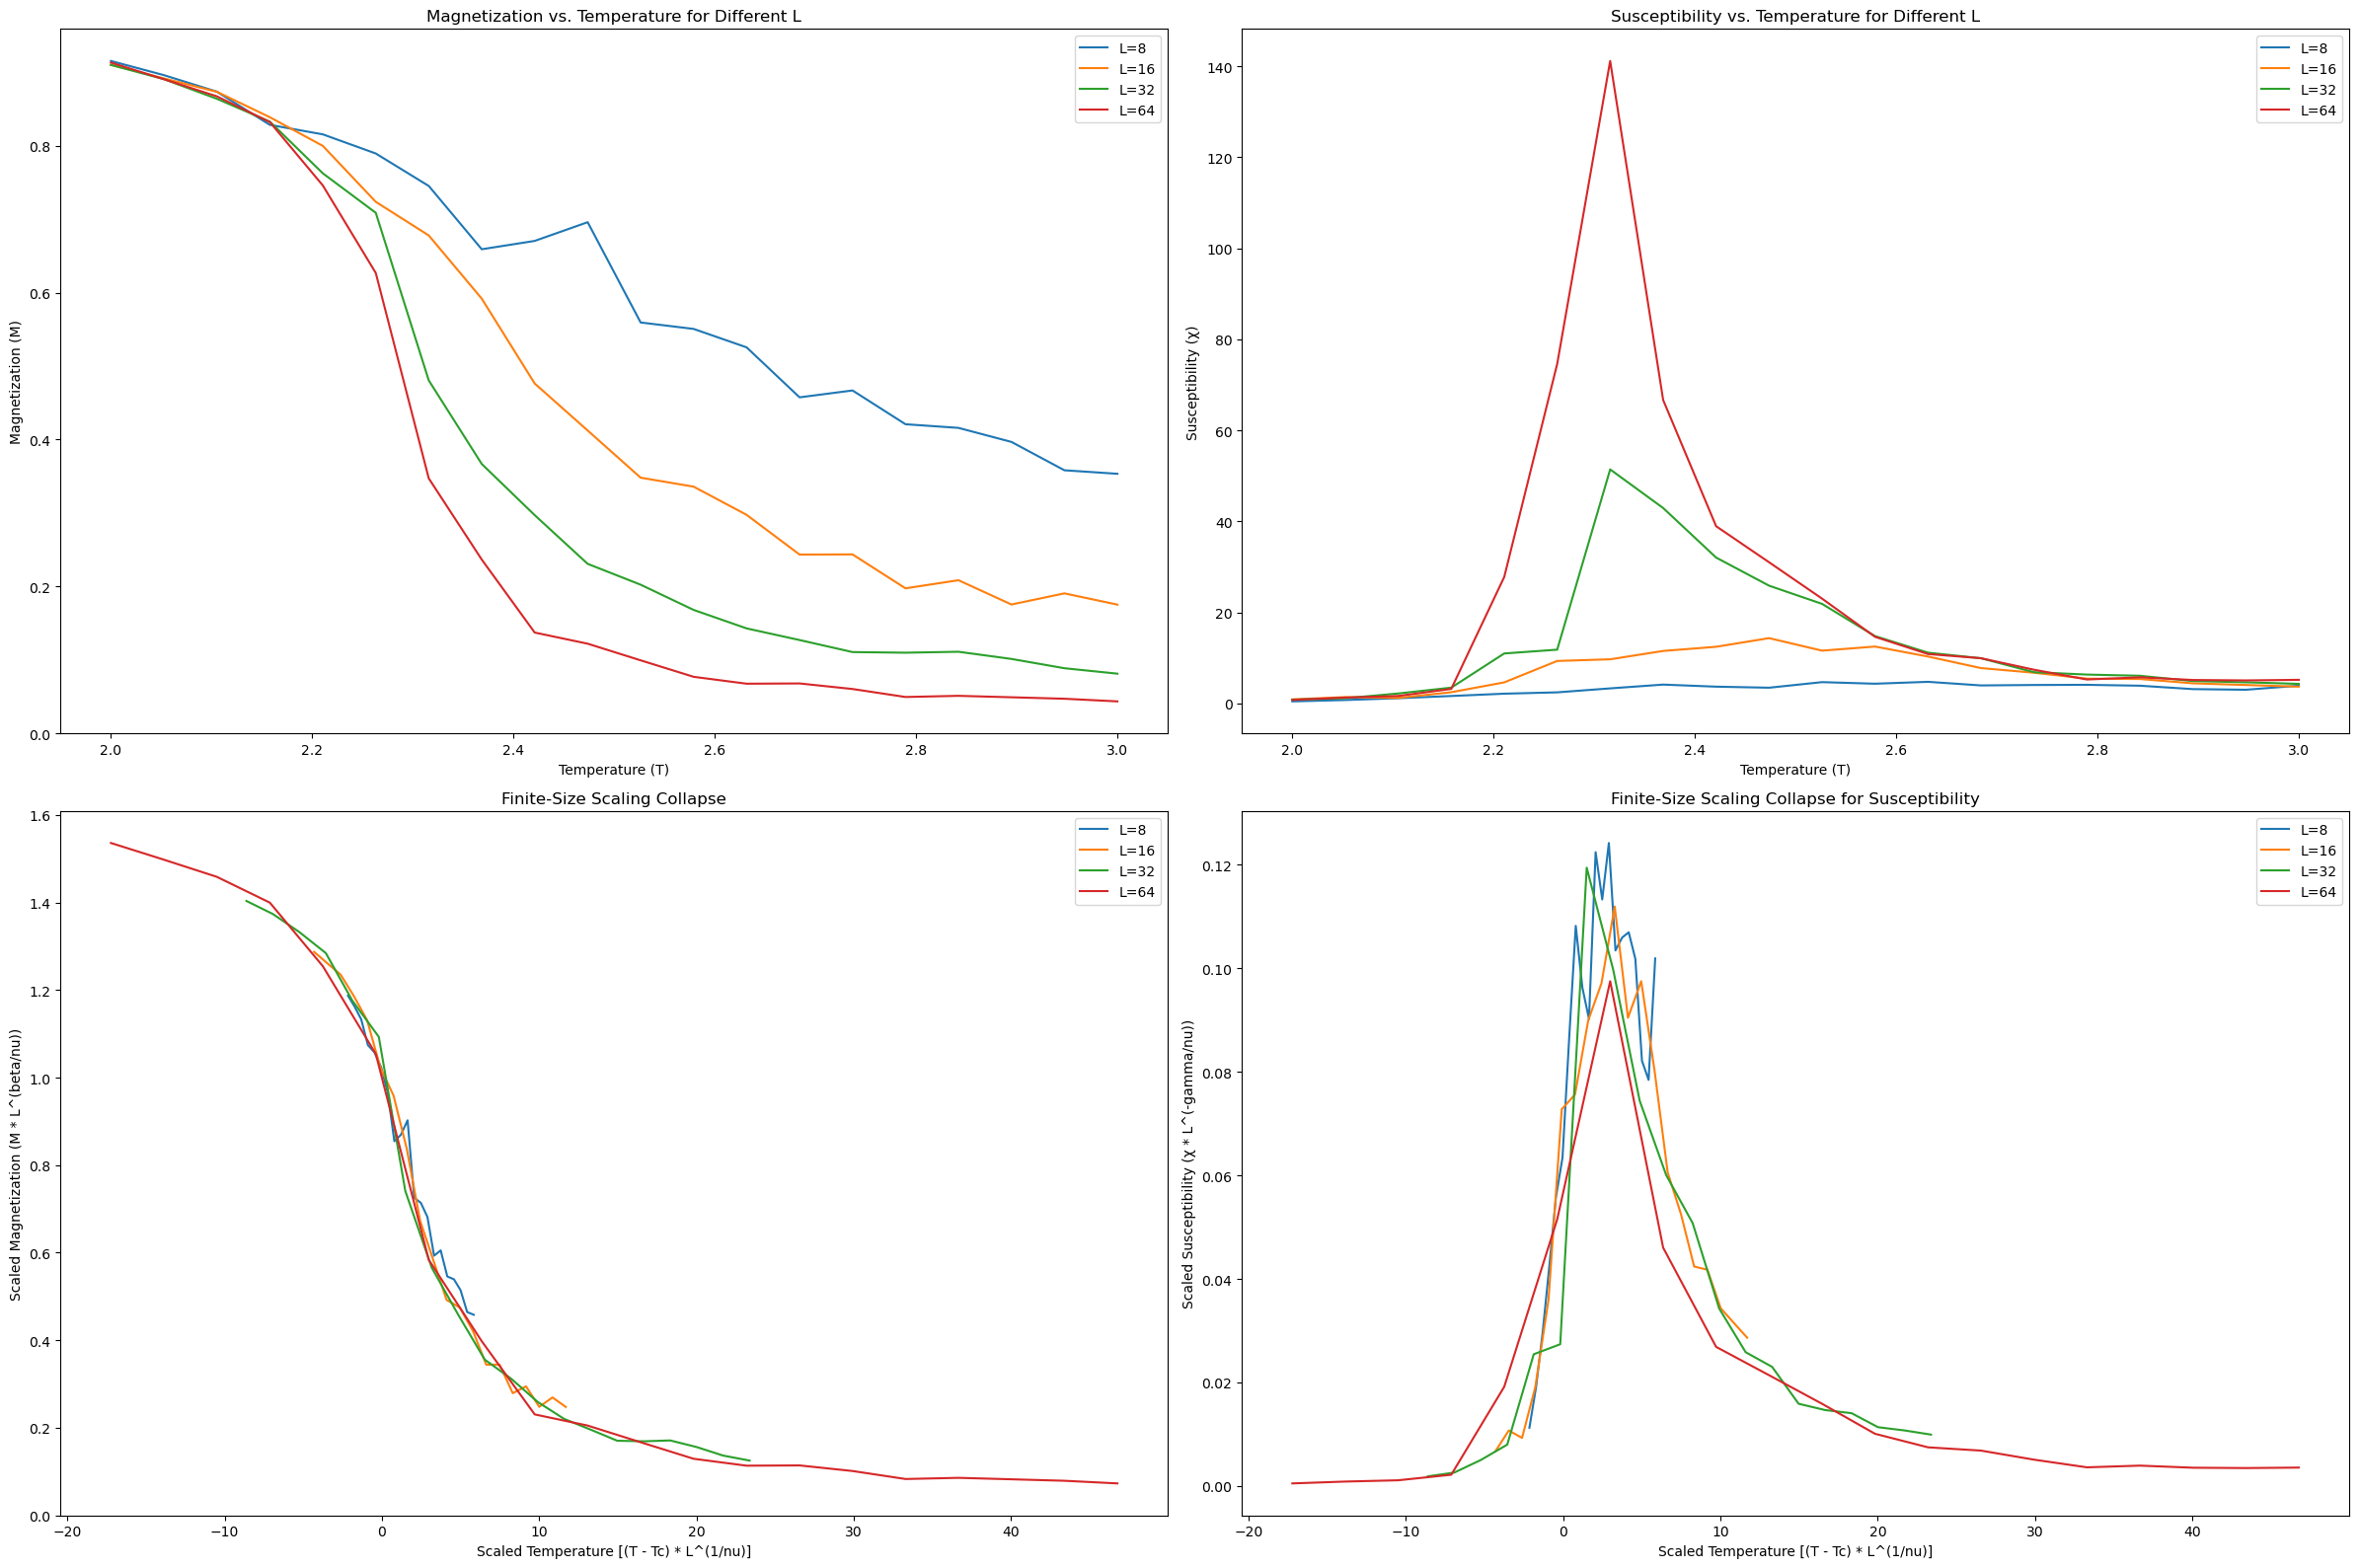

In [10]:
import numpy as np
import random
import matplotlib.pyplot as plt

############################### Initialization ###############################################

# Lookup table for the weights
def weight_table(J, kT):
    W = np.ones(5)  # Initialize W as an array of ones
    for j in range(-4, 5, 2):  # Loop over the specified range
        index = (j + 4) // 2  # Convert energy change to index
        if j > 0:
            W[index] = np.exp(-2 * j * J / kT)  # Update W if j > 0
    return W

# Initialize lattice
def initial_lattice(L):
    return np.random.choice([-1, 1], size=(L, L))


####################################### Monte Carlo simulation #####################################
#@jit
def mc_simulation(L, lattice, J, kT, W, mcsmax, no, n_delta):
    ip = [(i + 1) % L for i in range(L)]  # Next index with PBC, adjusted for L
    im = [(i - 1) % L for i in range(L)]  # Previous index with PBC, adjusted for L
    
    magnetizations = []
    mag_squared = []
    mag_4 = []
    for mcs in range(1, mcsmax + 1):
        for i in range(L):
            for j in range(L):
                ici = lattice[i, j]
                ien = ici * (lattice[ip[i], j] + lattice[im[i], j] + lattice[i, ip[j]] + lattice[i, im[j]])
                index = (ien + 4) // 2
                if random.random() < W[index]:
                    lattice[i, j] *= -1
        if mcs > no and (mcs - no) % n_delta == 0: #after 100 equilibrium steps no and then every n_delta steps
            M = np.sum(lattice)
            magnetizations.append(np.abs(M/(L**2)))
            mag_squared.append((M**2)/(L**4))
            mag_4.append((M**4)/(L**8))
    return magnetizations, mag_squared,mag_4, lattice

# Function to run the simulation for different values of J and collect results
def run_simulation_for_different_L_and_T(L_values, T_values, J, mcsmax, no, n_delta, kT):
    results = {}
    for L in L_values:
        local_results = {}
        for T in T_values:
            scaled_J = J / kT  # Assuming J/kT is the scaled J for a given temperature
            W = weight_table(scaled_J, T)  # Use T instead of kT for temperature
            lattice = initial_lattice(L)
            mag_vs_mcs, mag_squared, mag_4, final_lattice = mc_simulation(L, lattice, scaled_J, T, W, mcsmax, no, n_delta)
            mean_mag = np.mean(mag_vs_mcs)
            mean_mag_squared = np.mean(mag_squared)
            mean_mag_4 = np.mean(mag_4)
            susceptibility = (mean_mag_squared - mean_mag**2) * L**2 / kT
            transition_point = 1- mean_mag_4/(3*mean_mag_squared**2)
            
            # Calculate mean magnetization and other quantities here using mag_vs_mcs, mag_squared, and mag_4
            # ...
            local_results[T] = {
                'magnetizations': mag_vs_mcs,
                'final_lattice': final_lattice,
                'final_magnetization': mag_vs_mcs[-1],
                'susceptibility': susceptibility,
                'mean_mag_squared':mean_mag_squared,
                'mean_mag_4':mean_mag_4,
                'transition_point':transition_point
                # ... [other results]
            }
        results[L] = local_results
    return results

#################################### PLotting functions #############################################

def plot_magnetization_temp(ax, results, L_values, T_values):
    for L in L_values:
        magnetizations = [np.mean(results[L][T]['magnetizations']) for T in T_values]
        ax.plot(T_values, magnetizations, label=f'L={L}')
    ax.set_xlabel('Temperature (T)')
    ax.set_ylabel('Magnetization (M)')
    ax.set_title('Magnetization vs. Temperature for Different L')
    ax.legend()

def plot_finite_size_scaling(ax, results, L_values, T_values, Tc, nu, beta):
    for L in L_values:
        xs, ys = [], []
        for T in T_values:
            mean_magnetization = np.mean(results[L][T]['magnetizations'])
            x = (T - Tc) * L**(1/nu)
            y = mean_magnetization * L**(beta/nu)
            xs.append(x)
            ys.append(y)
        ax.plot(xs, ys, label=f'L={L}')
    ax.set_xlabel('Scaled Temperature [(T - Tc) * L^(1/nu)]')
    ax.set_ylabel('Scaled Magnetization (M * L^(beta/nu))')
    ax.set_title('Finite-Size Scaling Collapse')
    ax.legend()

def plot_susceptibility_temp(ax, results, L_values, T_values):
    for L in L_values:
        susceptibilities = [results[L][T]['susceptibility'] for T in T_values]
        ax.plot(T_values, susceptibilities, label=f'L={L}')
    ax.set_xlabel('Temperature (T)')
    ax.set_ylabel('Susceptibility (χ)')
    ax.set_title('Susceptibility vs. Temperature for Different L')
    ax.legend()

def plot_finite_size_scaling_susceptibility(ax, results, L_values, T_values, Tc, gamma, nu):
    for L in L_values:
        xs, ys = [], []
        for T in T_values:
            susceptibility = results[L][T]['susceptibility']
            x = (T - Tc) * L**(1/nu)
            y = susceptibility * L**(-gamma/nu)
            xs.append(x)
            ys.append(y)
        ax.plot(xs, ys, label=f'L={L}')
    ax.set_xlabel('Scaled Temperature [(T - Tc) * L^(1/nu)]')
    ax.set_ylabel('Scaled Susceptibility (χ * L^(-gamma/nu))')
    ax.set_title('Finite-Size Scaling Collapse for Susceptibility')
    ax.legend()


# Function to plot all results
def plot_results_for_L(results, L_values, J_values, mcsmax, no, n_delta):
    markers = ['o', 's', '^', 'd', '*']  # Now includes diamond and star
    #line_styles = ['-', '--', '-.', ':', 'None']  
    plt.figure(figsize=(12, 8))
    for index,L in enumerate(L_values):
        final_magnetizations = [results[L][J]['final_magnetization'] for J in J_values]
        plt.plot(J_values, final_magnetizations,'k',marker=markers[index], linestyle='-',label=f'L={L}')
    plt.xlabel('J/kT')
    plt.ylabel('Final Magnetization')
    plt.title('Final Magnetization vs. J/kT for different L')
    plt.legend()
    plt.show()
    
    markers = ['o', 's', '^', 'd', '*']  # Now includes diamond and star
    #line_styles = ['-', '--', '-.', ':', 'None'] 
    plt.figure(figsize=(12, 8))
    for index,L in enumerate(L_values):
        susceptibilities = [results[L][J]['susceptibility'] for J in J_values]
        plt.plot(J_values, susceptibilities,'k',marker=markers[index], linestyle='-',label=f'L={L}')
    plt.xlabel('J/kT')
    plt.ylabel('Susceptibility')
    plt.title('Susceptibility vs. J/kT for different L')
    plt.legend()
    plt.show()
    
def plot_transition_points_specific_pairs(final_results, pairs, J_values):
    plt.figure(figsize=(12, 8))
    for L1, L2 in pairs:
        ratios = []
        for J in J_values:
            if J in final_results[L1] and J in final_results[L2]:
                U_L1 = final_results[L1][J]['transition_point']
                U_L2 = final_results[L2][J]['transition_point']
                ratio = U_L1 / U_L2
                ratios.append(ratio)
            else:
                ratios.append(np.nan)  # Handle cases where J is not in both results
            
        plt.plot(J_values, ratios, label=f'L={L1}/L={L2}')
    
    plt.xlabel('J/kT')
    plt.ylabel('U_L / U_L\'')
    plt.title('Binder Cumulant Ratio vs. J/kT for Specific L Pairs')
    plt.legend()
    plt.grid(True)
    plt.show()
 ###################################### Parameters ################################   

L_values = [8, 16, 32,64]  # Lattice sizes
T_values = np.linspace(2, 3, 20)  # Temperature values around Tc
J = 1  # Fixed J value
mcsmax = 3500  # Number of Monte Carlo steps
no = 350  # Number of equilibration steps
n_delta = 20  # Interval of steps for analysis
Tc = 2.26918531421  # Critical temperature (from Onsager's solution)
kT = 1
nu = 1.0  # Critical exponent for the correlation length
beta = 1/8  # Critical exponent for the magnetization
gamma = 7/4 #critical exponent for susceptibility

####################################### Main #############################################
# Run the simulation
start_time = time.time()
final_results = run_simulation_for_different_L_and_T(L_values, T_values, J, mcsmax, no, n_delta, kT)
end_time = time.time()
print(f"Simulation run time: {end_time - start_time:.2f} seconds")

# Plotting the results
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(24, 16))

plot_magnetization_temp(ax1, final_results, L_values, T_values)
plot_susceptibility_temp(ax2, final_results, L_values, T_values)
plot_finite_size_scaling(ax3, final_results, L_values, T_values, Tc, nu, beta)
plot_finite_size_scaling_susceptibility(ax4, final_results, L_values, T_values, Tc, gamma, nu)

plt.tight_layout()
plt.show()

#plot_results_for_L(final_results, L_values, J_values, mcsmax, no, n_delta)
# After running the simulations and obtaining final_results, plot the Binder cumulant ratios for the specified pairs
#plot_transition_points_specific_pairs(final_results, specific_pairs, J_values)




## Bonus: finite size scaling for M for L=8,16,32, 64 and 128

Simulation run time: 1698.94 seconds


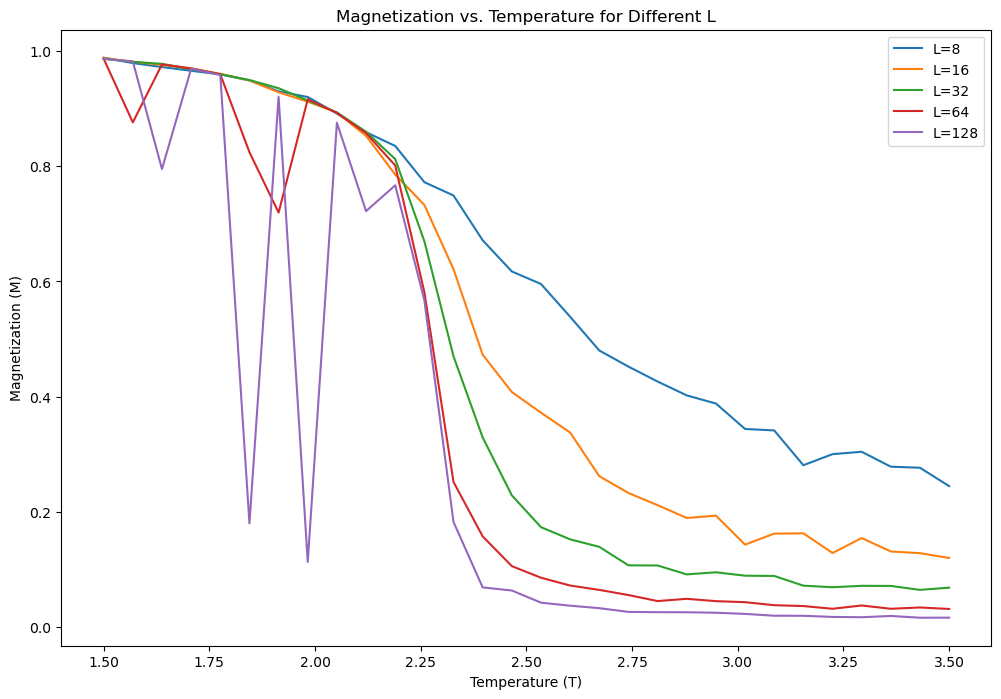

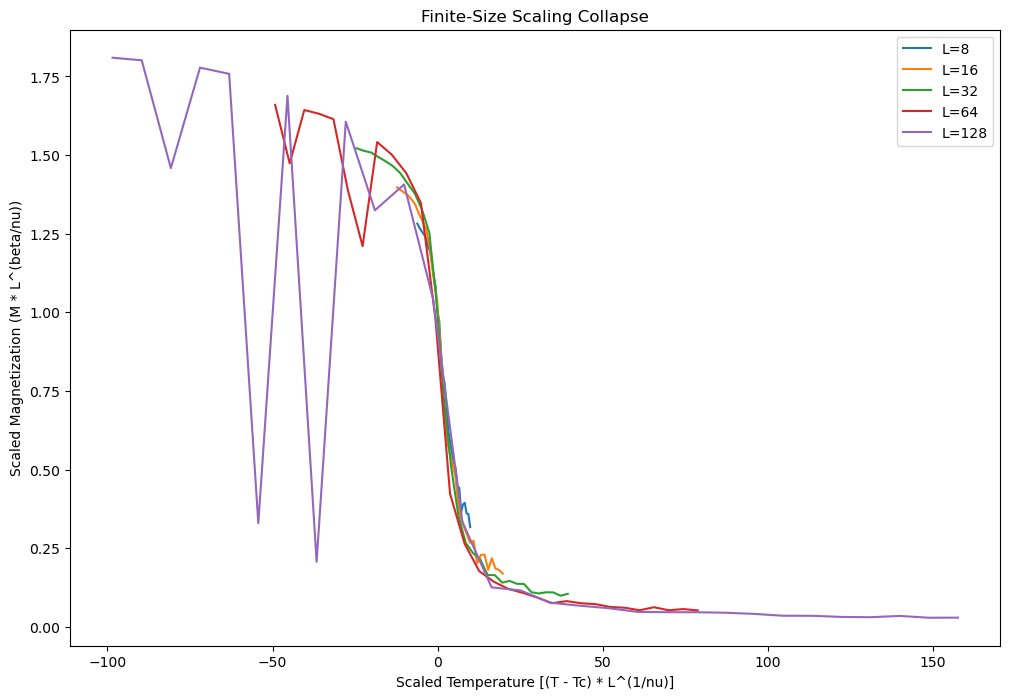

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import time

# ... [other functions] ...

# Function to plot magnetization as a function of temperature
def plot_magnetization_temp(results, L_values, T_values):
    plt.figure(figsize=(12, 8))
    for L in L_values:
        magnetizations = [np.mean(results[L][T]['magnetizations']) for T in T_values]
        plt.plot(T_values, magnetizations, label=f'L={L}')
    plt.xlabel('Temperature (T)')
    plt.ylabel('Magnetization (M)')
    plt.title('Magnetization vs. Temperature for Different L')
    plt.legend()
    plt.show()

# Function to plot the finite-size scaling collapse
def plot_finite_size_scaling(results, L_values, T_values, Tc, nu, beta):
    plt.figure(figsize=(12, 8))
    for L in L_values:
        xs, ys = [], []
        for T in T_values:
            mean_magnetization = np.mean(results[L][T]['magnetizations'])
            x = (T - Tc) * L**(1/nu)
            y = mean_magnetization * L**(beta/nu)
            xs.append(x)
            ys.append(y)
        plt.plot(xs, ys, label=f'L={L}')
    plt.xlabel('Scaled Temperature [(T - Tc) * L^(1/nu)]')
    plt.ylabel('Scaled Magnetization (M * L^(beta/nu))')
    plt.title('Finite-Size Scaling Collapse')
    plt.legend()
    plt.show()

# Parameters
L_values = [8, 16, 32, 64,128]  # Lattice sizes
T_values = np.linspace(1.5, 3.5, 30)  # Temperature values around Tc
J = 1  # Fixed J value
mcsmax = 3000  # Number of Monte Carlo steps
no = 300  # Number of equilibration steps
n_delta = 20  # Interval of steps for analysis
Tc = 2.26918531421  # Critical temperature (from Onsager's solution)
nu = 1.0  # Critical exponent for the correlation length
beta = 1/8  # Critical exponent for the magnetization

# Run the simulation
start_time = time.time()
final_results = run_simulation_for_different_L_and_T(L_values, T_values, J, mcsmax, no, n_delta, kT)
end_time = time.time()
print(f"Simulation run time: {end_time - start_time:.2f} seconds")

# Plotting the results

plot_magnetization_temp(final_results, L_values, T_values)
plot_finite_size_scaling(final_results, L_values, T_values, Tc, nu, beta)



## Potts model, but this is rather crap i guess do not use

Simulation run time: 116.87 seconds


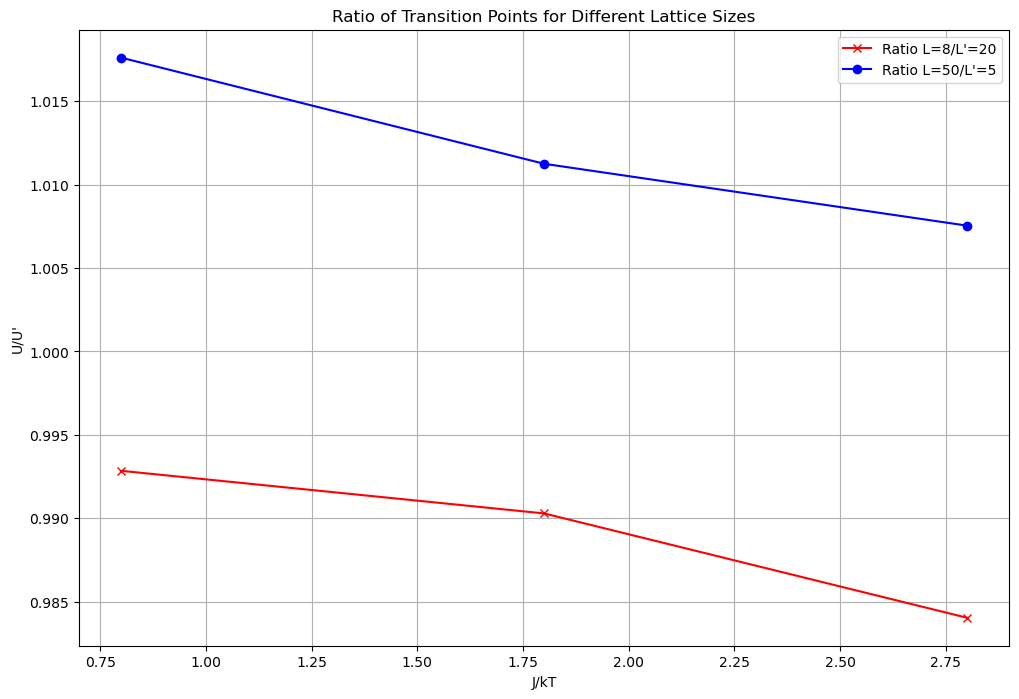

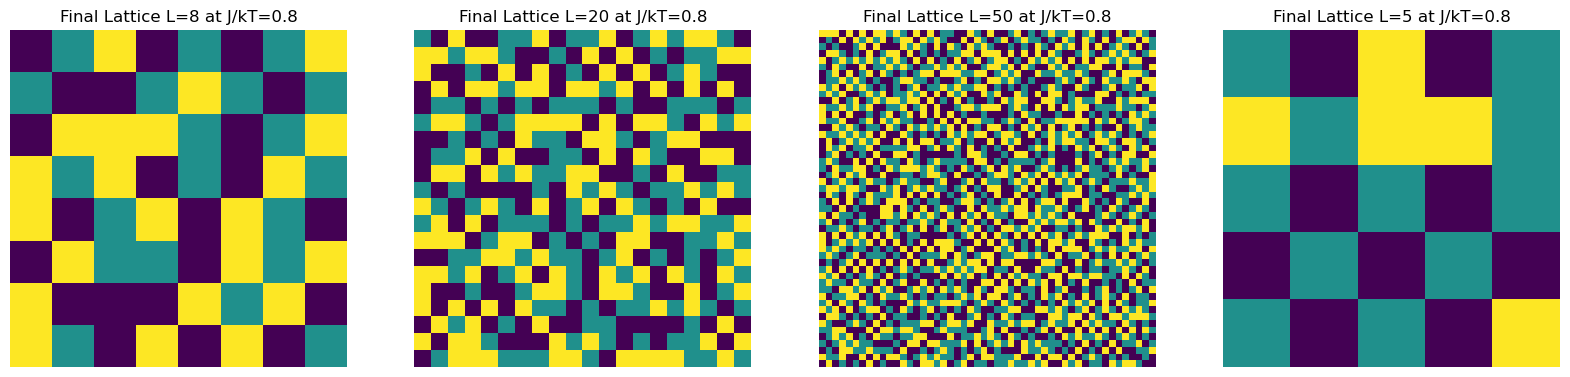

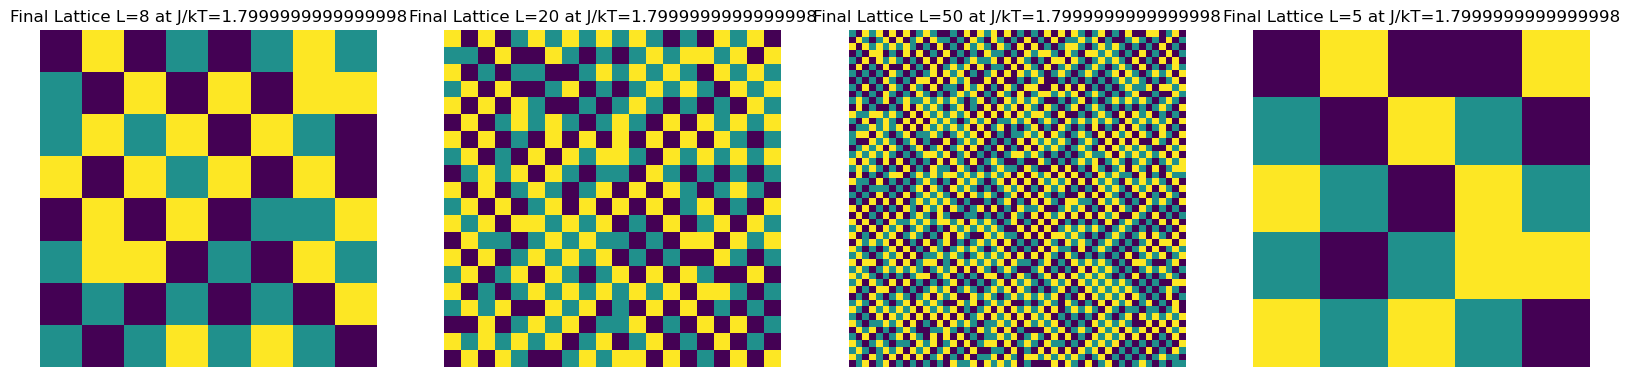

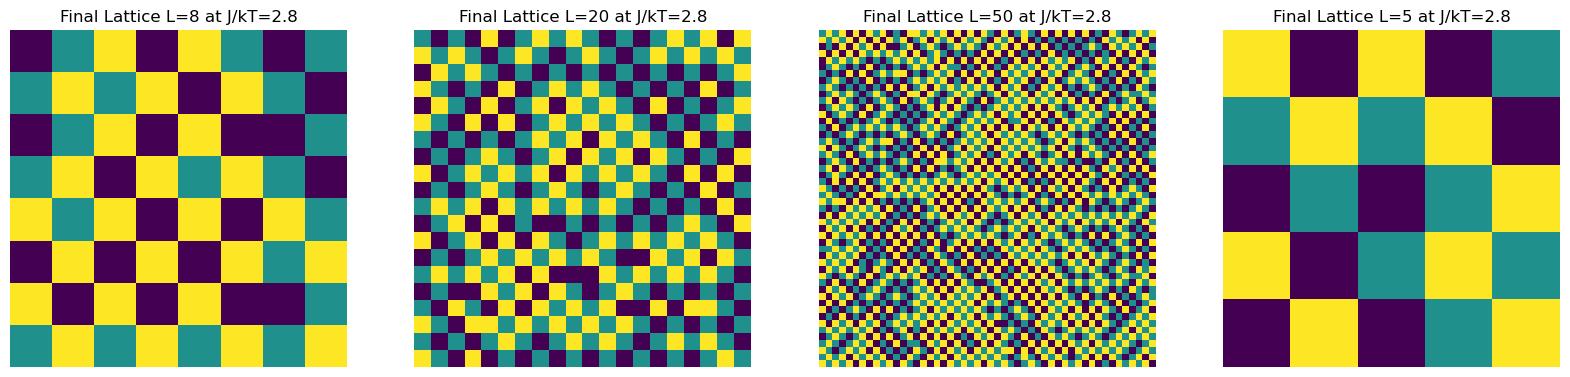

In [29]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time

# Constants
L_values = [8, 20, 50, 5]  # Lattice sizes
J_values = np.linspace(0.8, 2.8, 3)  # J values
L_values_pairs = [(8, 20), (50, 5)]  # Pairs for ratio calculation
mcsmax = 2000  # Number of Monte Carlo steps
no = 300  # Number of equilibration steps
n_delta = 10  # Interval of Monte Carlo steps to skip for analysis
q = 3  # Number of Potts states, can be changed as needed

# Initialize lattice for q-state Potts model
def initial_potts_lattice(L, q):
    return np.random.choice(np.arange(q), size=(L, L))

# Monte Carlo simulation for q-state Potts model
def mc_potts_simulation(L, lattice, J, kT, mcsmax, no, n_delta, q):
    ip = [(i + 1) % L for i in range(L)]  # Next index with PBC
    im = [(i - 1) % L for i in range(L)]  # Previous index with PBC
    
    magnetizations = []
    mag_squared = []
    mag_4 = []
    for mcs in range(1, mcsmax + 1):
        for i in range(L):
            for j in range(L):
                current_state = lattice[i, j]
                proposed_state = (current_state + np.random.randint(1, q)) % q
                delta_E = 0
                for neighbor in [(ip[i], j), (im[i], j), (i, ip[j]), (i, im[j])]:
                    delta_E -= J * (int(lattice[neighbor] == current_state) - int(lattice[neighbor] == proposed_state))
                
                # Metropolis acceptance criterion (accept if energy is lowered or based on thermal fluctuations)
                if delta_E <= 0 or np.random.random() < np.exp(-delta_E / kT):
                    lattice[i, j] = proposed_state
        if mcs > no and (mcs - no) % n_delta == 0: # after no equilibrium steps and then every n_delta steps
            M = np.sum(lattice == np.arange(q)[:, None, None], axis=(1, 2))
            mag_per_state = M / M.sum()
            mag_squared.append(np.sum(mag_per_state**2))
            mag_4.append(np.sum(mag_per_state**4))

    mean_mag_squared = np.mean(mag_squared)
    mean_mag_4 = np.mean(mag_4)
    susceptibility = (mean_mag_squared - mean_mag_squared**2) * L**2 / kT
    transition_point = 1 - mean_mag_4 / (3 * mean_mag_squared**2)

    return mean_mag_squared, susceptibility, transition_point, lattice

# Function to run the simulation for different values of J and collect results
def run_simulation_for_different_J(L, J_values, mcsmax, no, n_delta, q):
    local_results = {}
    for J in J_values:
        lattice = initial_potts_lattice(L, q)
        mean_mag_squared, susceptibility, transition_point, final_lattice = mc_potts_simulation(L, lattice, J, kT, mcsmax, no, n_delta, q)
        local_results[J] = {
            'mean_mag_squared': mean_mag_squared,
            'susceptibility': susceptibility,
            'transition_point': transition_point,
            'final_lattice': final_lattice
        }
    return local_results

def run_simulation_for_different_L_and_J(L_values, J_values, mcsmax, no, n_delta, q):
    results = {}
    for L in L_values:
        results[L] = run_simulation_for_different_J(L, J_values, mcsmax, no, n_delta, q)
    return results
def plot_transition_points(final_results, L_values_pairs, J_values):
    plt.figure(figsize=(12, 8))
    
    # Define markers for distinction in the plot
    markers = ['x', 'o']
    colors = ['r', 'b']  # Use colors to differentiate the lines
    
    for pair_index, (L, L_prime) in enumerate(L_values_pairs):
        U_L = np.array([final_results[L][J]['transition_point'] for J in J_values])
        U_L_prime = np.array([final_results[L_prime][J]['transition_point'] for J in J_values])
        
        ratio = U_L / U_L_prime
        
        # Plot the ratio with distinct markers and colors
        plt.plot(J_values, ratio, marker=markers[pair_index], color=colors[pair_index],
                 linestyle='-', label=f'Ratio L={L}/L\'={L_prime}')
    
    plt.xlabel('J/kT')
    plt.ylabel('U/U\'')
    plt.title('Ratio of Transition Points for Different Lattice Sizes')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_final_lattices(final_results, L_values, J_values):
    for J_value in J_values:
        num_L = len(L_values)
        fig, axes = plt.subplots(1, num_L, figsize=(5*num_L, 5))
        if num_L == 1:
            axes = [axes]  # Ensure axes is iterable

        for ax, L in zip(axes, L_values):
            ax.set_title(f'Final Lattice L={L} at J/kT={J_value}')
            ax.imshow(final_results[L][J_value]['final_lattice'], cmap='viridis', interpolation='nearest')
            ax.axis('off')  # Turn off axis

    plt.show()


# Example usage
start_time = time.time()
final_results = run_simulation_for_different_L_and_J(L_values, J_values, mcsmax, no, n_delta, q)
end_time = time.time()
print(f"Simulation run time: {end_time - start_time:.2f} seconds")

# ... existing plotting functions ...
plot_transition_points(final_results, L_values_pairs, J_values)
# Ensure to use the updated final_results with the Potts model data

plot_final_lattices(final_results, L_values, J_values)

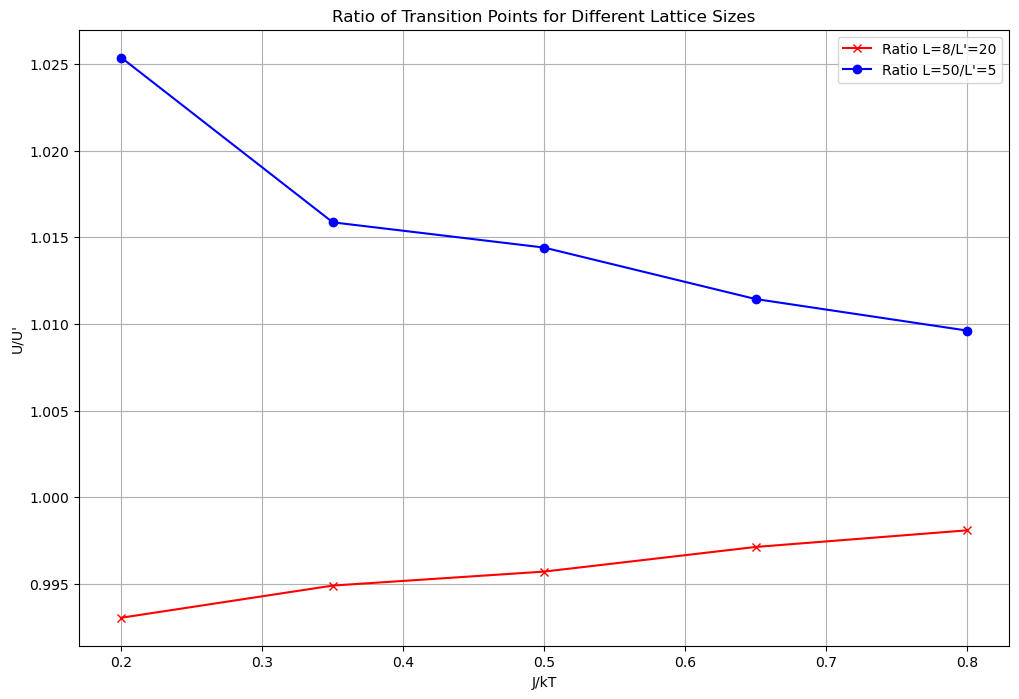

In [14]:
def plot_transition_points(final_results, L_values_pairs, J_values):
    plt.figure(figsize=(12, 8))
    
    # Define markers for distinction in the plot
    markers = ['x', 'o']
    colors = ['r', 'b']  # Use colors to differentiate the lines
    
    for pair_index, (L, L_prime) in enumerate(L_values_pairs):
        U_L = np.array([final_results[L][J]['transition_point'] for J in J_values])
        U_L_prime = np.array([final_results[L_prime][J]['transition_point'] for J in J_values])
        
        ratio = U_L / U_L_prime
        
        # Plot the ratio with distinct markers and colors
        plt.plot(J_values, ratio, marker=markers[pair_index], color=colors[pair_index],
                 linestyle='-', label=f'Ratio L={L}/L\'={L_prime}')
    
    plt.xlabel('J/kT')
    plt.ylabel('U/U\'')
    plt.title('Ratio of Transition Points for Different Lattice Sizes')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_transition_points(final_results, L_values_pairs, J_values)

C:\Users\fabia\AppData\Local\Temp\ipykernel_4844\42582158.py:23: DeprecationWarning: Please use `label` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  lw, num = measurements.label(bonds)


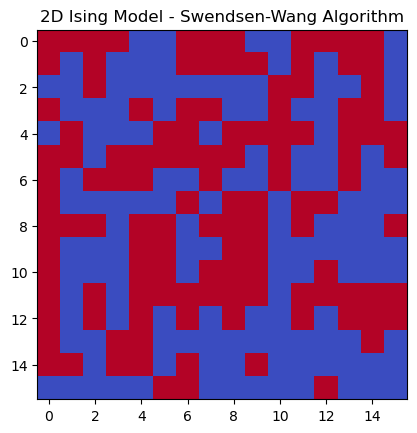

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import measurements

def initialize_lattice(N):
    return np.random.choice([-1, 1], size=(N, N))

def swendsen_wang_step(lattice, beta):
    N = lattice.shape[0]
    # Create a bond matrix where sites are initially disconnected
    bonds = np.zeros((N, N), dtype=bool)
    # Visit each site and decide whether to connect it with neighbors
    for i in range(N):
        for j in range(N):
            if i > 0 and lattice[i, j] == lattice[i-1, j]:
                if np.random.rand() < 1 - np.exp(-2 * beta):
                    bonds[i, j] = bonds[i-1, j] = True
            if j > 0 and lattice[i, j] == lattice[i, j-1]:
                if np.random.rand() < 1 - np.exp(-2 * beta):
                    bonds[i, j] = bonds[i, j-1] = True

    # Identify clusters
    lw, num = measurements.label(bonds)
    # Flip each cluster with 50% probability
    labels = np.arange(lw.max() + 1)
    np.random.shuffle(labels)
    flips = labels < lw.max() / 2
    lattice[np.isin(lw, labels[flips])] *= -1

def simulate_ising(N, beta, steps):
    lattice = initialize_lattice(N)
    for _ in range(steps):
        swendsen_wang_step(lattice, beta)
    return lattice

# Parameters
N = 16  # Lattice size
beta = 0.1  # Inverse temperature
steps = 2000  # Number of Monte Carlo steps

# Simulation
lattice = simulate_ising(N, beta, steps)

# Visualization
plt.imshow(lattice, cmap='coolwarm')
plt.title('2D Ising Model - Swendsen-Wang Algorithm')
plt.show()
